* Cargar librerías

In [108]:
import pandas as pd
import numpy as np
from datetime import datetime
from src import soporte_limpieza as spl
import matplotlib.pyplot as plt
import seaborn as sns

* Carga de datos

In [109]:
df_2013 = pd.read_csv("datos/datos-2013.csv", delimiter=";", encoding='latin-1')
df_2014 = pd.read_csv("datos/datos-2014.csv", delimiter=";", encoding='latin-1')
df_2015 = pd.read_csv("datos/datos-2015.csv", delimiter=";", encoding='latin-1')
df_2016 = pd.read_csv("datos/datos-2016.csv", delimiter=";", encoding='latin-1')
df_2017 = pd.read_csv("datos/datos-2017.csv", delimiter=";", encoding='latin-1')
df_2018 = pd.read_csv("datos/datos-2018.csv", delimiter=";", encoding='latin-1')
df_2019 = pd.read_csv("datos/datos-2019.csv", delimiter=";", encoding='latin-1')
df_2020 = pd.read_csv("datos/datos-2020.csv", delimiter=";", encoding='latin-1')
df_2021 = pd.read_csv("datos/datos-2021.csv", delimiter=";", encoding='latin-1')
pd.set_option("display.max_columns",None)

* Exploración archivos individuales

* Archivo 2013

In [110]:
df_2013.head(3)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,"0,00","0,00","1297,13","0,00",31/12/2013,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,"0,00","0,00","26666621,42","0,00",31/12/2013,2013
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,"0,00","0,00","301251,13","0,00",31/12/2013,2013


In [111]:
df_2013.shape

(4498, 16)

In [112]:
df_2013.columns

Index(['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'CATEGORIA ECONÔMICA', 'ORIGEM RECEITA', 'ESPÉCIE RECEITA',
       'DETALHAMENTO', 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO',
       'VALOR REALIZADO', 'PERCENTUAL REALIZADO', 'DATA LANÇAMENTO',
       'ANO EXERCÍCIO'],
      dtype='object')

Las columnas tienen nombres separados por espacios, es mejor quitarlos para evitar errores

In [113]:
spl.mod_titulo_columnas(df_2013)

In [114]:
df_2013.columns

Index(['CÓDIGO_ÓRGÃO_SUPERIOR', 'NOME_ÓRGÃO_SUPERIOR', 'CÓDIGO_ÓRGÃO',
       'NOME_ÓRGÃO', 'CÓDIGO_UNIDADE_GESTORA', 'NOME_UNIDADE_GESTORA',
       'CATEGORIA_ECONÔMICA', 'ORIGEM_RECEITA', 'ESPÉCIE_RECEITA',
       'DETALHAMENTO', 'VALOR_PREVISTO_ATUALIZADO', 'VALOR_LANÇADO',
       'VALOR_REALIZADO', 'PERCENTUAL_REALIZADO', 'DATA_LANÇAMENTO',
       'ANO_EXERCÍCIO'],
      dtype='object')

In [115]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498 entries, 0 to 4497
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CÓDIGO_ÓRGÃO_SUPERIOR      4498 non-null   int64 
 1   NOME_ÓRGÃO_SUPERIOR        4498 non-null   object
 2   CÓDIGO_ÓRGÃO               4498 non-null   int64 
 3   NOME_ÓRGÃO                 4498 non-null   object
 4   CÓDIGO_UNIDADE_GESTORA     4498 non-null   int64 
 5   NOME_UNIDADE_GESTORA       4498 non-null   object
 6   CATEGORIA_ECONÔMICA        4498 non-null   object
 7   ORIGEM_RECEITA             4498 non-null   object
 8   ESPÉCIE_RECEITA            4498 non-null   object
 9   DETALHAMENTO               4498 non-null   object
 10  VALOR_PREVISTO_ATUALIZADO  4498 non-null   object
 11  VALOR_LANÇADO              4498 non-null   object
 12  VALOR_REALIZADO            4498 non-null   object
 13  PERCENTUAL_REALIZADO       4498 non-null   object
 14  DATA_LAN

Las columnas en el rango [10:14] son tipo objeto y deben ser tipo float (contienen datos numéricos)
La columna DATA_LANÇAMENTO es de tipo objeto y debe ser tipo fecha

In [116]:
for x in df_2013.iloc[:, 10:14]:
    df_2013[x] = df_2013[x].str.replace(',', '').astype(float)


In [117]:
df_2013["DATA_LANÇAMENTO"] = pd.to_datetime(df_2013["DATA_LANÇAMENTO"])

C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\1023659979.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_2013["DATA_LANÇAMENTO"] = pd.to_datetime(df_2013["DATA_LANÇAMENTO"])


In [118]:
# comprobar que se han cambiado los tipos de datos en todas las columnas
df_2013.dtypes

CÓDIGO_ÓRGÃO_SUPERIOR                 int64
NOME_ÓRGÃO_SUPERIOR                  object
CÓDIGO_ÓRGÃO                          int64
NOME_ÓRGÃO                           object
CÓDIGO_UNIDADE_GESTORA                int64
NOME_UNIDADE_GESTORA                 object
CATEGORIA_ECONÔMICA                  object
ORIGEM_RECEITA                       object
ESPÉCIE_RECEITA                      object
DETALHAMENTO                         object
VALOR_PREVISTO_ATUALIZADO           float64
VALOR_LANÇADO                       float64
VALOR_REALIZADO                     float64
PERCENTUAL_REALIZADO                float64
DATA_LANÇAMENTO              datetime64[ns]
ANO_EXERCÍCIO                         int64
dtype: object

In [119]:
# comprobar si hay nulos
df_2013.isnull().sum()

CÓDIGO_ÓRGÃO_SUPERIOR        0
NOME_ÓRGÃO_SUPERIOR          0
CÓDIGO_ÓRGÃO                 0
NOME_ÓRGÃO                   0
CÓDIGO_UNIDADE_GESTORA       0
NOME_UNIDADE_GESTORA         0
CATEGORIA_ECONÔMICA          0
ORIGEM_RECEITA               0
ESPÉCIE_RECEITA              0
DETALHAMENTO                 0
VALOR_PREVISTO_ATUALIZADO    0
VALOR_LANÇADO                0
VALOR_REALIZADO              0
PERCENTUAL_REALIZADO         0
DATA_LANÇAMENTO              0
ANO_EXERCÍCIO                0
dtype: int64

In [120]:
# comprobar si hay duplicados
df_2013.duplicated().sum()

np.int64(0)

In [121]:
df_2013["PERCENTUAL_REALIZADO"].value_counts()

PERCENTUAL_REALIZADO
0.0           2320
100.0           30
9600.0          26
11100.0         21
10000.0         21
              ... 
20900.0          1
12143600.0       1
13735300.0       1
21200.0          1
70600.0          1
Name: count, Length: 578, dtype: int64

Crear columnas dia, mes y año lanzamiento

In [122]:
df_2013["DIA_LANÇAMENTO"] = df_2013["DATA_LANÇAMENTO"].dt.day

In [123]:
df_2013["MES_LANÇAMENTO"] = df_2013["DATA_LANÇAMENTO"].dt.month

In [124]:
df_2013["ANO_LANÇAMENTO"] = df_2013["DATA_LANÇAMENTO"].dt.year

In [125]:
#nulos en todos los df
for x in (df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021):
    print(f"dataframe {x.iloc[0,15]}")
    print(x.isnull().sum())
    print("-------")

dataframe 2013
CÓDIGO_ÓRGÃO_SUPERIOR        0
NOME_ÓRGÃO_SUPERIOR          0
CÓDIGO_ÓRGÃO                 0
NOME_ÓRGÃO                   0
CÓDIGO_UNIDADE_GESTORA       0
NOME_UNIDADE_GESTORA         0
CATEGORIA_ECONÔMICA          0
ORIGEM_RECEITA               0
ESPÉCIE_RECEITA              0
DETALHAMENTO                 0
VALOR_PREVISTO_ATUALIZADO    0
VALOR_LANÇADO                0
VALOR_REALIZADO              0
PERCENTUAL_REALIZADO         0
DATA_LANÇAMENTO              0
ANO_EXERCÍCIO                0
DIA_LANÇAMENTO               0
MES_LANÇAMENTO               0
ANO_LANÇAMENTO               0
dtype: int64
-------
dataframe 2014
CÓDIGO ÓRGÃO SUPERIOR        0
NOME ÓRGÃO SUPERIOR          0
CÓDIGO ÓRGÃO                 0
NOME ÓRGÃO                   0
CÓDIGO UNIDADE GESTORA       0
NOME UNIDADE GESTORA         0
CATEGORIA ECONÔMICA          0
ORIGEM RECEITA               0
ESPÉCIE RECEITA              0
DETALHAMENTO                 0
VALOR PREVISTO ATUALIZADO    0
VALOR LANÇADO      

CÓDIGO ÓRGÃO SUPERIOR         0
NOME ÓRGÃO SUPERIOR           0
CÓDIGO ÓRGÃO                  0
NOME ÓRGÃO                    0
CÓDIGO UNIDADE GESTORA        0
NOME UNIDADE GESTORA          0
CATEGORIA ECONÔMICA           0
ORIGEM RECEITA                0
ESPÉCIE RECEITA               0
DETALHAMENTO                  0
VALOR PREVISTO ATUALIZADO     0
VALOR LANÇADO                 0
VALOR REALIZADO               0
PERCENTUAL REALIZADO          0
DATA LANÇAMENTO              86
ANO EXERCÍCIO                 0
dtype: int64
-------
dataframe 2018
CÓDIGO ÓRGÃO SUPERIOR          0
NOME ÓRGÃO SUPERIOR            0
CÓDIGO ÓRGÃO                   0
NOME ÓRGÃO                     0
CÓDIGO UNIDADE GESTORA         0
NOME UNIDADE GESTORA           0
CATEGORIA ECONÔMICA            0
ORIGEM RECEITA                 0
ESPÉCIE RECEITA                0
DETALHAMENTO                   0
VALOR PREVISTO ATUALIZADO      0
VALOR LANÇADO                  0
VALOR REALIZADO                0
PERCENTUAL REALIZADO   

In [126]:
# duplicados en todos los df 
for x in (df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021):
    print(f"dataframe {x.iloc[0,15]}")
    print(x.duplicated().sum())
    print("-------")

dataframe 2013
0
-------
dataframe 2014
0
-------
dataframe 2015
0
-------
dataframe 2016
0
-------
dataframe 2017
0
-------
dataframe 2018
0
-------
dataframe 2019
0
-------
dataframe 2020
0
-------
dataframe 2021
0
-------


* Limpieza resto de df

In [127]:
spl.limpieza_archivos((df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021))

c:\Users\pepel\Hackio\Proyectos\Proyecto2-EDA-Ingresos-Publicos-Brasil\src\soporte_limpieza.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["DATA_LANÇAMENTO"] = df["DATA_LANÇAMENTO"].fillna(method = "bfill")
c:\Users\pepel\Hackio\Proyectos\Proyecto2-EDA-Ingresos-Publicos-Brasil\src\soporte_limpieza.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["DATA_LANÇAMENTO"] = df["DATA_LANÇAMENTO"].fillna(method = "bfill")
c:\Users\pepel\Hackio\Proyectos\Proyecto2-EDA-Ingresos-Publicos-Brasil\src\soporte_limpieza.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["DATA_LANÇAMENTO"] = df["DATA_LANÇAMENTO"].fillna(method = "bfill")
c:\Users\pepel\Hackio\Proyectos\Proyecto2-EDA-Ingresos-Publicos-Brasil\src\soporte_li

* Concatenación DF

In [128]:
df_todo = pd.concat((df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021))

In [129]:
df_todo.shape

(1026299, 19)

In [130]:
df_todo.dtypes

CÓDIGO_ÓRGÃO_SUPERIOR                 int64
NOME_ÓRGÃO_SUPERIOR                  object
CÓDIGO_ÓRGÃO                          int64
NOME_ÓRGÃO                           object
CÓDIGO_UNIDADE_GESTORA                int64
NOME_UNIDADE_GESTORA                 object
CATEGORIA_ECONÔMICA                  object
ORIGEM_RECEITA                       object
ESPÉCIE_RECEITA                      object
DETALHAMENTO                         object
VALOR_PREVISTO_ATUALIZADO           float64
VALOR_LANÇADO                       float64
VALOR_REALIZADO                     float64
PERCENTUAL_REALIZADO                float64
DATA_LANÇAMENTO              datetime64[ns]
ANO_EXERCÍCIO                         int64
DIA_LANÇAMENTO                        int32
MES_LANÇAMENTO                        int32
ANO_LANÇAMENTO                        int32
dtype: object

In [131]:
df_todo.isnull().sum()

CÓDIGO_ÓRGÃO_SUPERIOR        0
NOME_ÓRGÃO_SUPERIOR          0
CÓDIGO_ÓRGÃO                 0
NOME_ÓRGÃO                   0
CÓDIGO_UNIDADE_GESTORA       0
NOME_UNIDADE_GESTORA         0
CATEGORIA_ECONÔMICA          0
ORIGEM_RECEITA               0
ESPÉCIE_RECEITA              0
DETALHAMENTO                 0
VALOR_PREVISTO_ATUALIZADO    0
VALOR_LANÇADO                0
VALOR_REALIZADO              0
PERCENTUAL_REALIZADO         0
DATA_LANÇAMENTO              0
ANO_EXERCÍCIO                0
DIA_LANÇAMENTO               0
MES_LANÇAMENTO               0
ANO_LANÇAMENTO               0
dtype: int64

In [132]:
df_todo.duplicated().sum()

np.int64(0)

In [133]:
df_todo.to_csv("datos/datos-unidos.csv")

* Traducir fichero

In [134]:
df_todo.replace({
    "Ministério da Educação": "Ministerio de Educación",
    "Ministério da Economia": "Ministerio de Economía",
    "Ministério da Defesa": "Ministerio de Defensa",
    "Ministério da Agricultura, Pecuária e Abastec": "Ministerio de Agricultura, Ganadería y Abastecimiento",
    "Ministério da Justiça e Segurança Pública": "Ministerio de Justicia y Seguridad Pública",
    "Ministério da Infraestrutura": "Ministerio de Infraestructura",
    "Ministério da Saúde": "Ministerio de Salud",
    "Ministério de Minas e Energia": "Ministerio de Minas y Energía",
    "Ministério da Ciência, Tecnologia, Inovações": "Ministerio de Ciencia, Tecnología e Innovaciones",
    "Ministério do Desenvolvimento Regional": "Ministerio de Desarrollo Regional",
    "Ministério das Comunicações": "Ministerio de Comunicaciones",
    "Ministério do Meio Ambiente": "Ministerio del Medio Ambiente",
    "Ministério do Turismo": "Ministerio de Turismo",
    "Ministério da Cidadania": "Ministerio de Ciudadanía",
    "Presidência da República": "Presidencia de la República",
    "Advocacia-Geral da União": "Abogacía General de la Unión",
    "Ministério das Relações Exteriores": "Ministerio de Relaciones Exteriores",
    "Ministério da Mulher, Família e Direitos Humanos": "Ministerio de la Mujer, Familia y Derechos Humanos",
    "Ministério do Trabalho e Emprego": "Ministerio de Trabajo y Empleo",
    "Ministério do Desenvolvimento Agrário": "Ministerio de Desarrollo Agrario",
    "Ministério da Pesca e Aquicultura": "Ministerio de Pesca y Acuicultura",
    "Ministério das Mulheres, Igualdade Racial, da Juventude e dos Direitos Humanos": "Ministerio de las Mujeres, Igualdad Racial y Derechos Humanos",
    "Controladoria-Geral da União": "Controlaría General de la Unión",
    "Ministério do Esporte": "Ministerio de Deporte",
    "Ministério da Previdência Social": "Ministerio de Previsión Social"
}, inplace=True)

In [135]:
df_todo.replace({
    'Advocacia-Geral da União - Unidades com vínculo direto': 'Abogacía General de la Unión - Unidades con vínculo directo',
    'Controladoria-Geral da União': 'Controladuría General de la Unión',
    'Empresa Brasileira de Pesquisa Agropecuária': 'Empresa Brasileña de Investigación Agropecuaria',
    'Ministério da Agricultura, Pecuária e Abastecimento - Unidades com vínculo direto': 'Ministerio de Agricultura, Ganadería y Abastecimiento - Unidades con vínculo directo',
    'Companhia Nacional de Abastecimento': 'Compañía Nacional de Abastecimiento',
    'Serviço Florestal Brasileiro': 'Servicio Forestal Brasileño',
    'Instituto Nacional de Colonização e Reforma Agrária': 'Instituto Nacional de Colonización y Reforma Agraria',
    'Fundo de Defesa da Economia Cafeeira': 'Fondo de Defensa de la Economía Cafetera',
    'Fundo de Terras e da Reforma Agrária': 'Fondo de Tierras y Reforma Agraria',
    'Ministério da Cidadania - Unidades com vínculo direto': 'Ministerio de la Ciudadanía - Unidades con vínculo directo',
    'Fundo Nacional de Assistência Social': 'Fondo Nacional de Asistencia Social',
    'Ministério da Ciência, Tecnologia, Inovações e Comunicações - Unidades com vínculo direto': 'Ministerio de Ciencia, Tecnología, Innovaciones y Comunicaciones - Unidades con vínculo directo',
    'Conselho Nacional de Desenvolvimento Científico e Tecnológico': 'Consejo Nacional de Desarrollo Científico y Tecnológico',
    'Comissão Nacional de Energia Nuclear': 'Comisión Nacional de Energía Nuclear',
    'Fundo Nacional de Desenvolvimento Científico e Tecnológico': 'Fondo Nacional de Desarrollo Científico y Tecnológico',
    'Financiadora de Estudos e Projetos': 'Financiadora de Estudios y Proyectos',
    'Centro Nacional de Tecnologia Eletrônica Avançada S.A.': 'Centro Nacional de Tecnología Electrónica Avanzada S.A.',
    'Agência Espacial Brasileira': 'Agencia Espacial Brasileña',
    'Empresa Brasileira de Correios e Telégrafos': 'Empresa Brasileña de Correos y Telégrafos',
    'Fundo Aeronáutico': 'Fondo Aeronáutico',
    'Fundo do Exército': 'Fondo del Ejército',
    'Comando da Marinha - Fundo Naval': 'Comando de la Marina - Fondo Naval',
    'Fundo Aeroviário': 'Fondo Aeroviario',
    'Comando da Marinha': 'Comando de la Marina',
    'Comando do Exército': 'Comando del Ejército',
    'Comando da Aeronáutica': 'Comando de la Aeronáutica',
    'Caixa de Construções de Casas para o Pessoal da Marinha do Brasil': 'Caja de Construcción de Casas para el Personal de la Marina de Brasil',
    'Ministério da Defesa - Unidades com vínculo direto': 'Ministerio de Defensa - Unidades con vínculo directo',
    'Fundo de Desenvolvimento do Ensino Profissional Marítimo': 'Fondo de Desarrollo de la Enseñanza Profesional Marítima',
    'Indústria de Material Bélico do Brasil': 'Industria de Material Bélico de Brasil',
    'Caixa de Financiamento Imobiliário da Aeronáutica': 'Caja de Financiación Inmobiliaria de la Aeronáutica',
    'Fundação Osório': 'Fundación Osório',
    'Ministério da Economia - Unidades com vínculo direto': 'Ministerio de Economía - Unidades con vínculo directo',
    'Instituto Nacional de Metrologia, Qualidade e Tecnologia': 'Instituto Nacional de Metrología, Calidad y Tecnología',
    'Instituto Nacional do Seguro Social': 'Instituto Nacional de la Seguridad Social',
    'Fundação Instituto Brasileiro de Geografia e Estatística': 'Fundación Instituto Brasileño de Geografía y Estadística',
    'Superintendência da Zona Franca de Manaus': 'Superintendencia de la Zona Franca de Manaos',
    'Banco Central do Brasil - Orçamento Fiscal e Seguridade Social': 'Banco Central de Brasil - Presupuesto Fiscal y Seguridad Social',
    'Fundo de Amparo ao Trabalhador': 'Fondo de Amparo al Trabajador',
    'Superintendência de Seguros Privados': 'Superintendencia de Seguros Privados',
    'Superintendência Nacional de Previdência Complementar': 'Superintendencia Nacional de Pensiones Complementarias',
    'Instituto Nacional da Propriedade Industrial': 'Instituto Nacional de Propiedad Industrial',
    'Comissão de Valores Mobiliários': 'Comisión de Valores Mobiliarios',
    'Fundação Jorge Duprat Figueiredo, de Segurança e Medicina do Trabalho': 'Fundación Jorge Duprat Figueiredo, de Seguridad y Medicina del Trabajo',
    'Fundação Escola Nacional de Administração Pública': 'Fundación Escuela Nacional de Administración Pública',
    'Fundo Constitucional do Distrito Federal': 'Fondo Constitucional del Distrito Federal',
    'Serviço Federal de Processamento de Dados': 'Servicio Federal de Procesamiento de Datos',
    'Fundo de Garantia à Exportação': 'Fondo de Garantía a la Exportación',
    'Companhia de Entrepostos e Armazéns Gerais de São Paulo': 'Compañía de Almacenes y Depósitos Generales de São Paulo',
    'Fundo de Compensação de Variações Salariais': 'Fondo de Compensación de Variaciones Salariales',
    'Casa da Moeda do Brasil': 'Casa de la Moneda de Brasil',
    'Fundo de Estabilidade do Seguro Rural': 'Fondo de Estabilidad del Seguro Rural',
    'Instituto de Pesquisa Econômica Aplicada': 'Instituto de Investigación Económica Aplicada',
    'Fundo de Garantia para a Promoção da Competitividade': 'Fondo de Garantía para la Promoción de la Competitividad',
    'Fundo Contingente da Extinta RFFSA-FCMP': 'Fondo Contingente de la Extinta RFFSA-FCMP',
    'Fundo Nacional de Desenvolvimento': 'Fondo Nacional de Desarrollo',
    'Fundo Soberano do Brasil': 'Fondo Soberano de Brasil',
    'Fundo de Apoio ao Desenvolvimento Social': 'Fondo de Apoyo al Desarrollo Social',
    'Instituto Federal do Rio Grande do Norte': 'Instituto Federal de Río Grande del Norte',
    'Fundação Universidade Federal do Mato Grosso': 'Fundación Universidad Federal de Mato Grosso',
    'Ministério da Educação - Unidades com vínculo direto': 'Ministerio de Educación - Unidades con vínculo directo',
    'Fundação Universidade Federal de São João Del-Rei': 'Fundación Universidad Federal de São João Del-Rei',
    'Universidade Federal do Ceará': 'Universidad Federal de Ceará',
    'Instituto Federal Goiano': 'Instituto Federal Goiano',
    'Universidade Federal da Bahia': 'Universidad Federal de Bahia',
    'Instituto Federal do Ceará': 'Instituto Federal de Ceará',
    'Fundação Joaquim Nabuco': 'Fundación Joaquim Nabuco',
    'Instituto Federal de Sergipe': 'Instituto Federal de Sergipe',
    'Instituto Federal Catarinense': 'Instituto Federal Catarinense',
    'Universidade Tecnológica Federal do Paraná': 'Universidad Tecnológica Federal de Paraná',
    'Fundação Universidade Federal do Tocantins': 'Fundación Universidad Federal de Tocantins',
    'Universidade Federal do Espírito Santo': 'Universidad Federal de Espíritu Santo',
    'Fundação Universidade Federal do Acre': 'Fundación Universidad Federal de Acre',
    'Universidade Federal de Minas Gerais': 'Universidad Federal de Minas Gerais',
    'Universidade Federal de Itajubá': 'Universidad Federal de Itajubá',
    'Universidade Federal do Rio Grande do Sul': 'Universidad Federal de Río Grande del Sur',
    'Instituto Federal do Paraná': 'Instituto Federal de Paraná',
    'Instituto Federal do Mato Grosso': 'Instituto Federal de Mato Grosso',
    'Universidade Federal do Rio Grande do Norte': 'Universidad Federal de Río Grande del Norte',
    'Instituto Federal de Rondônia': 'Instituto Federal de Rondônia',
    'Instituto Federal do Sudeste de Minas Gerais': 'Instituto Federal del Sudeste de Minas Gerais',
    'Fundação Universidade do Amazonas': 'Fundación Universidad de Amazonas',
    'Instituto Federal da Paraíba': 'Instituto Federal de Paraíba',
    'Instituto Federal do Norte de Minas Gerais': 'Instituto Federal del Norte de Minas Gerais',
    'Universidade Federal de Viçosa': 'Universidad Federal de Viçosa',
    'Instituto Federal do Sertão de Pernambuco': 'Instituto Federal del Sertón de Pernambuco',
    'Fundação Universidade Federal de Pelotas': 'Fundación Universidad Federal de Pelotas',
    'Instituto Federal do Pará': 'Instituto Federal de Pará',
    'Universidade Federal Rural da Amazônia': 'Universidad Federal Rural de la Amazonía',
    'Instituto Federal Farroupilha': 'Instituto Federal Farroupilha',
    'Instituto Federal de Pernambuco': 'Instituto Federal de Pernambuco',
    'Instituto Federal do Maranhão': 'Instituto Federal de Maranhão',
    'Universidade Federal da Paraíba': 'Universidad Federal de Paraíba',
    'Universidade Federal de Santa Catarina': 'Universidad Federal de Santa Catarina',
    'Instituto Federal do Rio de Janeiro': 'Instituto Federal de Río de Janeiro',
    'Instituto Federal de Brasília': 'Instituto Federal de Brasília',
    'Universidade Federal de Lavras': 'Universidad Federal de Lavras',
    'Instituto Federal do Sul de Minas Gerais': 'Instituto Federal del Sur de Minas Gerais',
    'Instituto Federal Baiano': 'Instituto Federal Baiano',
    'Universidade Federal Rural de Pernambuco': 'Universidad Federal Rural de Pernambuco',
    'Instituto Federal Fluminense': 'Instituto Federal Fluminense',
    'Instituto Federal de Minas Gerais': 'Instituto Federal de Minas Gerais',
    'Universidade Federal Rural do Semi-Árido': 'Universidad Federal Rural del Semiárido',
    'Instituto Federal do Tocantins': 'Instituto Federal de Tocantins',
    'Instituto Federal do Mato Grosso do Sul': 'Instituto Federal de Mato Grosso del Sur',
    'Fundação Coordenação de Aperfeiçoamento de Pessoal de Nível Superior': 'Fundación Coordinación de Mejoramiento de Personal de Nivel Superior',
    'Instituto Federal do Triângulo Mineiro': 'Instituto Federal del Triángulo Mineiro',
    'Universidade Federal Fluminense': 'Universidad Federal Fluminense',
    'Instituto Federal do Espírito Santo': 'Instituto Federal de Espírito Santo',
    'Universidade Federal dos Vales do Jequitinhonha e Mucuri': 'Universidad Federal de los Valles de Jequitinhonha y Mucuri',
    'Instituto Federal do Rio Grande do Sul': 'Instituto Federal de Río Grande del Sur',
    'Universidade Federal de Santa Maria': 'Universidad Federal de Santa María',
    'Fundação Universidade de Brasília': 'Fundación Universidad de Brasília',
    'Fundação Universidade Federal do Pampa': 'Fundación Universidad Federal de Pampa',
    'Instituto Federal de Alagoas': 'Instituto Federal de Alagoas',
    'Universidade Federal de Ouro Preto': 'Universidad Federal de Ouro Preto',
    'Universidade Federal de Campina Grande': 'Universidad Federal de Campina Grande',
    'Universidade Federal do Recôncavo da Bahia': 'Universidad Federal del Recôncavo de Bahía',
    'Instituto Federal do Amazonas': 'Instituto Federal de Amazonas',
    'Universidade Federal do Rio de Janeiro': 'Universidad Federal de Río de Janeiro',
    'Hospital de Clínicas de Porto Alegre': 'Hospital de Clínicas de Porto Alegre',
    'Fundo Nacional de Desenvolvimento da Educação': 'Fondo Nacional de Desarrollo de la Educación',
    'Instituto Federal do Acre': 'Instituto Federal de Acre',
    'Instituto Federal da Bahia': 'Instituto Federal de Bahía',
    'Fundação Universidade Federal de Rondônia': 'Fundación Universidad Federal de Rondônia',
    'Instituto Federal de Educação, Ciência e Tecnologia de Goiás': 'Instituto Federal de Educación, Ciencia y Tecnología de Goiás',
    'Centro Federal de Educação Tecnológica Celso Suckow da Fonseca': 'Centro Federal de Educación Tecnológica Celso Suckow de Fonseca',
    'Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira': 'Instituto Nacional de Estudios y Investigaciones Educacionales Anísio Teixeira',
    'Fundação Universidade Federal do Piauí': 'Fundación Universidad Federal de Piauí',
    'Colégio Pedro II': 'Colegio Pedro II',
    'Centro Federal de Educação Tecnológica de Minas Gerais': 'Centro Federal de Educación Tecnológica de Minas Gerais',
    'Universidade Federal de Alagoas': 'Universidad Federal de Alagoas',
    'Universidade Federal de Goiás': 'Universidad Federal de Goiás',
    'Universidade Federal de Alfenas': 'Universidad Federal de Alfenas',
    'Instituto Federal de Roraima': 'Instituto Federal de Roraima',
    'Instituto Federal de São Paulo': 'Instituto Federal de São Paulo',
    'Fundação Universidade do Maranhão': 'Fundación Universidad de Maranhão',
    'Instituto Federal de Santa Catarina': 'Instituto Federal de Santa Catarina',
    'Universidade Federal de São Paulo': 'Universidad Federal de São Paulo',
    'Universidade Federal da Fronteira Sul': 'Universidad Federal de la Frontera Sur',
    'Universidade Federal da Integração Latino-Americana': 'Universidad Federal de la Integración Latinoamericana',
    'Universidade Federal do Triângulo Mineiro': 'Universidad Federal del Triángulo Mineiro',
    'Universidade Federal de Juiz de Fora': 'Universidad Federal de Juiz de Fora',
    'Universidade Federal do Oeste do Pará': 'Universidad Federal del Oeste de Pará',
    'Universidade da Integração Internacional da Lusofonia Afro-Brasileira': 'Universidad de la Integración Internacional de la Lusofonía Afro-Brasileña',
    'Fundação Universidade Federal do ABC': 'Fundación Universidad Federal del ABC',
    'Fundação Universidade Federal do Vale do São Francisco': 'Fundación Universidad Federal del Valle del São Francisco',
    'Universidade Federal do Amapá': 'Universidad Federal de Amapá',
    'Fundação Universidade Federal de São Carlos': 'Fundación Universidad Federal de São Carlos',
    'Instituto Federal de Minas Gerais': 'Instituto Federal de Minas Gerais',
    'Universidade Federal de São João Del-Rei': 'Universidad Federal de São João Del-Rei',
    'Instituto Federal de Pernambuco': 'Instituto Federal de Pernambuco',
    'Universidade Federal de Ouro Preto': 'Universidad Federal de Ouro Preto',
    'Universidade de São Paulo': 'Universidad de São Paulo',
    'Universidade Federal de Uberlândia': 'Universidad Federal de Uberlândia',
    'Fundação Universidade Federal de Minas Gerais': 'Fundación Universidad Federal de Minas Gerais',
    'Universidade Estadual de Campinas': 'Universidad Estatal de Campinas',
    'Universidade Federal do Maranhão': 'Universidad Federal de Maranhão'
}, inplace=True
)

In [136]:
df_todo.replace({
    'Accounting': 'Contabilidad',
    'Brand': 'Marca',
    'Business Development': 'Desarrollo de Negocios',
    'Customer Service': 'Servicio al Cliente',
    'Data Analytics': 'Análisis de Datos',
    'Digital Marketing': 'Marketing Digital',
    'Finance': 'Finanzas',
    'Human Resources': 'Recursos Humanos',
    'IT (Information Technology)': 'Tecnologías de la Información',
    'Legal': 'Legal',
    'Logistics': 'Logística',
    'Marketing': 'Marketing',
    'Operations': 'Operaciones',
    'Product Management': 'Gestión de Producto',
    'Project Management': 'Gestión de Proyectos',
    'Purchasing / Procurement': 'Compras / Adquisiciones',
    'Quality Assurance': 'Aseguramiento de la Calidad',
    'Sales': 'Ventas',
    'Supply Chain': 'Cadena de Suministro',
    'Training / Development': 'Capacitación / Desarrollo',
    'Business Intelligence': 'Inteligencia Empresarial',
    'Communication': 'Comunicación',
    'Corporate Social Responsibility (CSR)': 'Responsabilidad Social Corporativa (RSC)',
    'Customer Experience': 'Experiencia del Cliente',
    'E-commerce': 'Comercio Electrónico',
    'Environmental Health and Safety (EHS)': 'Salud y Seguridad Ambiental (EHS)',
    'Facility Management': 'Gestión de Instalaciones',
    'Government Affairs': 'Asuntos Gubernamentales',
    'Investor Relations': 'Relaciones con Inversores',
    'Mergers and Acquisitions (M&A)': 'Fusiones y Adquisiciones (M&A)',
    'Public Relations': 'Relaciones Públicas',
    'R&D (Research and Development)': 'I+D (Investigación y Desarrollo)',
    'Risk Management': 'Gestión de Riesgos',
    'Security': 'Seguridad',
    'Sustainability': 'Sostenibilidad',
    'Tax': 'Impuestos',
    'Technology': 'Tecnología',
    'Training': 'Capacitación',
    'Legal and Compliance': 'Legal y Cumplimiento',
    'Manufacturing': 'Fabricación',
    'Operations Research': 'Investigación Operativa',
    'Product Marketing': 'Marketing de Producto',
    'Retail': 'Venta al por menor',
    'Strategy': 'Estrategia',
    'Transaction Services': 'Servicios de Transacción'
}, inplace=True)

In [137]:
df_todo.replace({
    'Receitas Correntes': 'Ingresos Corrientes',
    'Receitas de Capital': 'Ingresos de Capital',
    'Receitas Correntes - intra-orçamentárias': 'Ingresos Corrientes',
    'Sem informação': 'Sin información',
    'Receitas de Capital - intra-orçamentárias': 'Ingresos de Capital'
}, inplace=True
)

In [138]:
df_todo.replace({
    'Outras Receitas Correntes': 'Otras Ingresos Corrientes',
    'Receita de Serviços': 'Ingresos por Servicios',
    'Transferências de Capital': 'Transferencias de Capital',
    'Alienação de Bens': 'Enajenación de Bienes',
    'Receita Agropecuária': 'Ingresos Agropecuarios',
    'Transferências Correntes': 'Transferencias Corrientes',
    'Receita Patrimonial': 'Ingresos Patrimoniales',
    'Operações de Crédito': 'Operaciones de Crédito',
    'Impostos, Taxas e Contribuições de Melhoria': 'Impuestos, Tasas y Contribuciones de Mejora',
    'Amortizações de Empréstimos': 'Amortizaciones de Préstamos',
    'Contribuições': 'Contribuciones',
    'Receita Industrial': 'Ingresos Industriales',
    'Outras Receitas de Capital': 'Otras Ingresos de Capital',
    'Receitas Correntes - a classificar': 'Ingresos Corrientes - a clasificar',
    'Sem informação': 'Sin información'
}, inplace=True
)

In [139]:
df_todo.replace({
    'Bens, Direitos e Valores Incorporados ao Patr': 'Bienes, Derechos y Valores Incorporados al Patrimonio',
    'Indenizações, restituições e ressarcimentos': 'Indemnizaciones, restituciones y resarcimientos',
    'Multas administrativas, contratuais e judicia': 'Multas administrativas, contractuales y judiciales',
    'Demais receitas correntes': 'Otras Ingresos Corrientes',
    'Ingresos por Servicios': 'Ingresos por Servicios',
    'Transferências de Instituições Privadas': 'Transferencias de Instituciones Privadas',
    'Alienação de bens móveis': 'Enajenación de bienes muebles',
    'Receita da produção animal e derivados': 'Ingresos de la producción animal y derivados',
    'Transferências dos Municípios e de suas Entid': 'Transferencias de los Municipios y sus Entidades',
    'Alienação de bens imóveis': 'Enajenación de bienes inmuebles',
    'Transferências de Pessoas Físicas': 'Transferencias de Personas Físicas',
    'Valores Mobiliários': 'Valores Mobiliarios',
    'Exploração do patrimônio imobiliário do Estad': 'Explotación del patrimonio inmobiliario del Estado',
    'Operações de crédito - mercado interno': 'Operaciones de crédito - mercado interno',
    'Taxas': 'Tasas',
    'Delegação de Serviços Públicos Mediante Conce': 'Delegación de Servicios Públicos Mediante Concesión',
    'Outras receitas agropecuárias': 'Otras Ingresos Agropecuarios',
    'Amortizaciones de Préstamos': 'Amortizaciones de Préstamos',
    'Contribuições econômicas': 'Contribuciones económicas',
    'Transferências de Convênios': 'Transferencias de Convenios',
    'Indenizações e restituições': 'Indemnizaciones y restituciones',
    'Receitas da indústria de transformação': 'Ingresos de la industria de transformación',
    'Contribuições sociais': 'Contribuciones sociales',
    'Receita dívida ativa alienação de estoques de': 'Ingresos de deuda activa por enajenación de existencias',
    'Receita da produção vegetal': 'Ingresos de la producción vegetal',
    'Receita dívida ativa proveniente de amortizaç': 'Ingresos de deuda activa proveniente de amortizaciones',
    'Exploração de recursos naturais': 'Explotación de recursos naturales',
    'Ingresos Corrientes - a clasificar': 'Ingresos Corrientes - a clasificar',
    'Receita de concessões e permissões': 'Ingresos de concesiones y permisos',
    'Demais receitas patrimoniais': 'Otras Ingresos patrimoniales',
    'Cessão de direitos': 'Cesión de derechos',
    'Transferências de Outras Instituições Pública': 'Transferencias de Otras Instituciones Públicas',
    'Operações de crédito - mercado externo': 'Operaciones de crédito - mercado externo',
    'Impostos': 'Impuestos',
    'Resultado do Banco Central do Brasil': 'Resultado del Banco Central de Brasil',
    'Receitas decorrentes de aportes periódicos pa': 'Ingresos derivados de aportes periódicos',
    'Sin informação': 'Sin información',
    'Receitas de valores mobiliários': 'Ingresos de valores mobiliarios',
    'Receitas decorrentes de compensações ao Regim': 'Ingresos derivados de compensaciones al Régimen',
    'Receita títulos do tesouro nacional resgatado': 'Ingresos por títulos del tesoro nacional rescatados',
    'Remuneração das Disponibilidades do Tesouro N': 'Remuneración de las disponibilidades del Tesoro Nacional',
    'Outras receitas': 'Otras Ingresos',
    'Transferências do Exterior': 'Transferencias del Exterior',
    'Transferências dos Estados e do Distrito Fede': 'Transferencias de los Estados y el Distrito Federal',
    'Integralização do capital social': 'Integralización del capital social',
    'Receita da dívida ativa': 'Ingresos de la deuda activa',
    'Serviços Administrativos e Comerciais Gerais': 'Servicios Administrativos y Comerciales Generales',
    'Outros serviços': 'Otros servicios',
    'Ingresos Agropecuarios': 'Ingresos Agropecuarios',
    'Transferencias Corrientes': 'Transferencias Corrientes',
    'Transferências da União e de suas Entidades': 'Transferencias de la Unión y sus Entidades',
    'Ingresos Industriales': 'Ingresos Industriales',
    'Serviços e Atividades Financeiras': 'Servicios y Actividades Financieras',
    'Transferencias de Capital': 'Transferencias de Capital',
    'Serviços e Atividades Referentes à Saúde': 'Servicios y Actividades Relacionados con la Salud',
    'Serviços e Atividades Referentes à Navegação': 'Servicios y Actividades Relacionados con la Navegación',
    'Remuneração das Disponibilidades do Tesouro': 'Remuneración de las disponibilidades del Tesoro',
    'Contribuições para Entidades Privadas de Serv': 'Contribuciones para Entidades Privadas de Servicios',
    'Alienação de bens intangíveis': 'Enajenación de bienes intangibles',
    'Resgate de Títulos do Tesouro': 'Rescate de Títulos del Tesoro',
    'Exploração do patrimônio intangível': 'Explotación del patrimonio intangible',
    'Transferências Provenientes de Depósito Não I': 'Transferencias Provenientes de Depósito No Imponible',
    'Demais receitas de capital': 'Otras Ingresos de capital'
}
, inplace=True)

In [140]:
df_todo.sample(4)

,CÓDIGO_ÓRGÃO_SUPERIOR,NOME_ÓRGÃO_SUPERIOR,CÓDIGO_ÓRGÃO,NOME_ÓRGÃO,CÓDIGO_UNIDADE_GESTORA,NOME_UNIDADE_GESTORA,CATEGORIA_ECONÔMICA,ORIGEM_RECEITA,ESPÉCIE_RECEITA,DETALHAMENTO,VALOR_PREVISTO_ATUALIZADO,VALOR_LANÇADO,VALOR_REALIZADO,PERCENTUAL_REALIZADO,DATA_LANÇAMENTO,ANO_EXERCÍCIO,DIA_LANÇAMENTO,MES_LANÇAMENTO,ANO_LANÇAMENTO
126871,32000,Ministerio de Minas y Energía,29208,Companhia de Pesquisa de Recursos Minerais,495001,COMPANHIA DE PESQUISA DE RECURSOS MINERAIS,Ingresos Corrientes,Ingresos por Servicios,Servicios Administrativos y Comerciales Generales,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0.0,0.0,228782.0,0.0,2020-08-09,2020,9,8,2020
120306,26000,Ministerio de Educación,26409,Instituto Federal de Minas Gerais,158122,"INST.FED.DE EDUC.,CIENC.E TEC.DE MINAS GERAIS",Ingresos Corrientes,Ingresos por Servicios,Servicios Administrativos y Comerciales Generales,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0.0,0.0,631350.0,0.0,2018-01-17,2018,17,1,2018
132791,54000,Ministerio de Turismo,34902,Fundo Nacional de Cultura,540030,FUNDO NACIONAL DA CULTURA - FNC,Ingresos Corrientes,Ingresos Patrimoniales,Delegación de Servicios Públicos Mediante Conc...,OUTRAS.DLG.SV.TELEC-NAO.P.ORBITAIS/PRC,0.0,0.0,3096.0,0.0,2021-01-10,2021,10,1,2021
182958,44000,Ministerio del Medio Ambiente,44000,Ministério do Meio Ambiente - Unidades com vín...,440002,SUBSECRET.PLANEJAM.ORCAM.E ADMINIST±SPOA(MMA),Ingresos Corrientes,Ingresos Patrimoniales,Explotación de recursos naturales,UTILIZ.REC.HIDRICOS-DEMAIS EMPRESAS-PRINC.,0.0,0.0,16477621.0,0.0,2017-12-19,2017,19,12,2017


In [141]:
df_todo["VALOR_REALIZADO"].value_counts()

VALOR_REALIZADO
0.0           21007
10000.0        3515
20000.0        2878
2000.0         2858
5000.0         2701
              ...  
30430536.0        1
38041013.0        1
29225039.0        1
70857438.0        1
98593965.0        1
Name: count, Length: 605783, dtype: int64

In [142]:
df_todo["VALOR_PREVISTO_ATUALIZADO"].value_counts()

VALOR_PREVISTO_ATUALIZADO
0.000000e+00    1006459
1.000000e+08         22
3.000000e+07         15
1.000000e+09         14
1.000000e+07         13
                 ...   
7.806000e+05          1
5.085200e+06          1
4.575000e+05          1
3.326890e+07          1
1.110970e+07          1
Name: count, Length: 18588, dtype: int64

In [143]:
df_todo["VALOR_LANÇADO"].value_counts()

VALOR_LANÇADO
 0.0            1019081
-1.0                 32
 1.0                 25
 11.0                10
 2.0                  9
                 ...   
 76916.0              1
-9852936.0            1
 9852936.0            1
-4151808.0            1
 621856111.0          1
Name: count, Length: 6789, dtype: int64

In [144]:
df_todo["PERCENTUAL_REALIZADO"].value_counts()

PERCENTUAL_REALIZADO
 0.0          1018808
 100.0            570
 200.0            218
 300.0            148
 400.0            112
               ...   
 1151400.0          1
 1663100.0          1
-28200.0            1
 46000.0            1
 273700.0           1
Name: count, Length: 971, dtype: int64

In [145]:
df_todo.columns

Index(['CÓDIGO_ÓRGÃO_SUPERIOR', 'NOME_ÓRGÃO_SUPERIOR', 'CÓDIGO_ÓRGÃO',
       'NOME_ÓRGÃO', 'CÓDIGO_UNIDADE_GESTORA', 'NOME_UNIDADE_GESTORA',
       'CATEGORIA_ECONÔMICA', 'ORIGEM_RECEITA', 'ESPÉCIE_RECEITA',
       'DETALHAMENTO', 'VALOR_PREVISTO_ATUALIZADO', 'VALOR_LANÇADO',
       'VALOR_REALIZADO', 'PERCENTUAL_REALIZADO', 'DATA_LANÇAMENTO',
       'ANO_EXERCÍCIO', 'DIA_LANÇAMENTO', 'MES_LANÇAMENTO', 'ANO_LANÇAMENTO'],
      dtype='object')

In [146]:
df_todo.rename(columns={'CÓDIGO_ÓRGÃO_SUPERIOR' : "CODIGO_ORGANIZACION_SUPERIOR", 'NOME_ÓRGÃO_SUPERIOR' : "NOMBRE_ORGANIZACION_SUPERIOR", 'CÓDIGO_ÓRGÃO' : "CODIGO_ORGANIZACION",
       'NOME_ÓRGÃO' : "NOMRE_ORGANIZACION" , 'CÓDIGO_UNIDADE_GESTORA' : "CODIGO_UNIDAD_GESTORA", 'NOME_UNIDADE_GESTORA' : "NOMBRE_UNIDAD_GESTORA",
       'CATEGORIA_ECONÔMICA' : "CATEGORIA_ECONOMICA", 'ORIGEM_RECEITA' : "ORIGEN", 'ESPÉCIE_RECEITA' : "TIPO",
       'DETALHAMENTO' : "DETALLE", 'VALOR_PREVISTO_ATUALIZADO' : "VALOR_PREVISTO", 'VALOR_LANÇADO' : "VALOR_LANZADO",
       'DATA_LANÇAMENTO' : "FECHA", 'ANO_EXERCÍCIO' : "ANO_EJERCICIO", 'DIA_LANÇAMENTO' : "DIA_EJECUCION", 'MES_LANÇAMENTO' : "MES_EJECUCION", 'ANO_LANÇAMENTO' : "ANO_EJECUCION"}, inplace=True)

In [147]:
df_todo.rename(columns={"NOMRE_ORGANIZACION" : "NOMBRE_ORGANIZACION"}, inplace=True)

* Ingresos por años y mes

In [148]:
df_anos = df_todo.groupby(["ANO_EJERCICIO"])[['VALOR_REALIZADO']].agg('sum')

In [149]:
df_anos.sort_values("ANO_EJERCICIO", ascending=False, inplace=True)

In [150]:
df_anos["VALOR_REALIZADO"] = (df_anos["VALOR_REALIZADO"]/10000000000).round()

In [151]:
df_anos

,VALOR_REALIZADO
ANO_EJERCICIO,
2021,38764.0
2020,36314.0
2019,29916.0
2018,29424.0
2017,25580.0
2016,28397.0
2015,26657.0
2014,22386.0
2013,18936.0


In [152]:
df_mes = df_todo.groupby(["MES_EJECUCION"]).agg(
    TOTAL_RECAUDACION=("VALOR_REALIZADO",'sum'))
df_mes["TOTAL_RECAUDACION"] = (df_mes["TOTAL_RECAUDACION"]/10000000000).round()
df_mes

,TOTAL_RECAUDACION
MES_EJECUCION,
1,17317.0
2,11691.0
3,13799.0
4,14572.0
5,14212.0
6,11702.0
7,14398.0
8,18134.0
9,19111.0


In [241]:
df_mes_previsto = df_todo.groupby(["MES_EJECUCION"]).agg(
    TOTAL_PREVISTO=("VALOR_PREVISTO",'sum'))
df_mes_previsto["TOTAL_PREVISTO"] = (df_mes_previsto["TOTAL_PREVISTO"]).round()
df_mes_previsto

,TOTAL_PREVISTO
MES_EJECUCION,
1,1.320540e+15
2,0.000000e+00
3,0.000000e+00
4,4.180716e+14
5,0.000000e+00
6,0.000000e+00
7,5.311810e+09
8,1.417659e+10
9,0.000000e+00


In [153]:
df_mes_an = df_todo.groupby(["MES_EJECUCION", "ANO_EJERCICIO"])["VALOR_REALIZADO"].sum().reset_index()
df_mes_an["VALOR_REALIZADO"] = (df_mes_an["VALOR_REALIZADO"]/1000000000).round()
df_mes_an1 = df_mes_an.pivot(index="MES_EJECUCION", columns="ANO_EJERCICIO", values="VALOR_REALIZADO").fillna(0)
df_mes_an1["TOTAL_RECAUDACION"] = df_mes_an1.sum(axis=1)
df_mes_an1

ANO_EJERCICIO,2013,2014,2015,2016,2017,2018,2019,2020,2021,TOTAL_RECAUDACION
MES_EJECUCION,,,,,,,,,,
1,0.0,0.0,0.0,24325.0,33606.0,19275.0,25797.0,29879.0,40292.0,173174.0
2,0.0,0.0,0.0,16007.0,18656.0,23064.0,16339.0,25132.0,17717.0,116915.0
3,0.0,0.0,0.0,15608.0,20139.0,20444.0,23008.0,23843.0,34944.0,137986.0
4,0.0,0.0,0.0,19795.0,18971.0,21097.0,21950.0,30616.0,33290.0,145719.0
5,0.0,0.0,0.0,17750.0,13488.0,16647.0,28550.0,19734.0,45948.0,142117.0
6,0.0,0.0,0.0,16395.0,17614.0,21301.0,21848.0,17082.0,22782.0,117022.0
7,0.0,0.0,0.0,20037.0,20363.0,25316.0,18714.0,25294.0,34260.0,143984.0
8,0.0,0.0,0.0,20911.0,19076.0,28438.0,25202.0,63648.0,24065.0,181340.0
9,0.0,0.0,0.0,39729.0,19203.0,39733.0,22832.0,31470.0,38142.0,191109.0


* Ingresos por organización, categoría y tipo

In [154]:
df_org = df_todo.groupby(["NOMBRE_ORGANIZACION_SUPERIOR"]).agg(
    TOTAL_RECAUDACION=('VALOR_REALIZADO', 'sum'))
df_org.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_org["TOTAL_RECAUDACION"] = (df_org["TOTAL_RECAUDACION"]/10000000000).round()
df_org.head(5)

,TOTAL_RECAUDACION
NOMBRE_ORGANIZACION_SUPERIOR,
Ministerio de Economía,247098.0
Ministerio de Educación,2216.0
Ministerio de Minas y Energía,1915.0
Ministerio de Infraestructura,1362.0
Ministerio de Defensa,1047.0


In [155]:
df_org1 = df_todo.groupby(["NOMBRE_ORGANIZACION"]).agg(
    TOTAL_RECAUDACION=('VALOR_REALIZADO', 'sum'))
df_org1.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_org1["TOTAL_RECAUDACION"] = (df_org1["TOTAL_RECAUDACION"]/10000000000).round()
df_org1.head(5)

,TOTAL_RECAUDACION
NOMBRE_ORGANIZACION,
Ministerio de Economía - Unidades con vínculo directo,208883.0
Fundo do Regime Geral da Previdência Social,30164.0
Fondo de Amparo al Trabajador,3608.0
Instituto Nacional de la Seguridad Social,3185.0
Fondo Nacional de Desarrollo de la Educación,2081.0


In [156]:
df_org2 = df_todo.groupby(["NOMBRE_UNIDAD_GESTORA"]).agg(
    TOTAL_RECAUDACION=('VALOR_REALIZADO', 'sum'))
df_org2.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_org2["TOTAL_RECAUDACION"] = (df_org2["TOTAL_RECAUDACION"]/10000000000).round()
df_org2.head(5)

,TOTAL_RECAUDACION
NOMBRE_UNIDAD_GESTORA,
SETORIAL ORCAMENTARIA E FINANCEIRA / ME,208709.0
COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,30164.0
"COORD-GERAL DE ORCAMENTO, FIN. E CONT.- CGOFC",3608.0
"COORD.GERAL DE ORCAMENTO, FINANCAS E CONTAB.",3185.0
FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO,2081.0


In [157]:
df_cat = df_todo.groupby(["CATEGORIA_ECONOMICA"]).agg(
    TOTAL_RECAUDACION=('VALOR_REALIZADO', 'sum'))
df_cat.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_cat["TOTAL_RECAUDACION"] = (df_cat["TOTAL_RECAUDACION"]/10000000000).round()
df_cat.head(5)

,TOTAL_RECAUDACION
CATEGORIA_ECONOMICA,
Ingresos Corrientes,132020.0
Ingresos de Capital,124354.0
Sin información,0.0


In [158]:
df_todo.columns

Index(['CODIGO_ORGANIZACION_SUPERIOR', 'NOMBRE_ORGANIZACION_SUPERIOR',
       'CODIGO_ORGANIZACION', 'NOMBRE_ORGANIZACION', 'CODIGO_UNIDAD_GESTORA',
       'NOMBRE_UNIDAD_GESTORA', 'CATEGORIA_ECONOMICA', 'ORIGEN', 'TIPO',
       'DETALLE', 'VALOR_PREVISTO', 'VALOR_LANZADO', 'VALOR_REALIZADO',
       'PERCENTUAL_REALIZADO', 'FECHA', 'ANO_EJERCICIO', 'DIA_EJECUCION',
       'MES_EJECUCION', 'ANO_EJECUCION'],
      dtype='object')

In [159]:
df_tipo = df_todo.groupby(["TIPO"]).agg(
    TOTAL_RECAUDACION=('VALOR_REALIZADO', 'sum'))
df_tipo.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_tipo["TOTAL_RECAUDACION"] = (df_tipo["TOTAL_RECAUDACION"]/10000000000).round()
df_tipo.head(5)

,TOTAL_RECAUDACION
TIPO,
Operaciones de crédito - mercado interno,97528.0
Contribuciones sociales,69062.0
Impuestos,42218.0
Resultado del Banco Central de Brasil,10367.0
Amortizaciones de Préstamos,7990.0


In [160]:
df_origen = df_todo.groupby(["ORIGEN"]).agg(
    TOTAL_RECAUDACION=('VALOR_REALIZADO', 'sum'))
df_origen.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_origen["TOTAL_RECAUDACION"] = (df_origen["TOTAL_RECAUDACION"]/10000000000).round()
df_origen.head(5)

,TOTAL_RECAUDACION
ORIGEN,
Operaciones de Crédito,98859.0
Contribuciones,70436.0
"Impuestos, Tasas y Contribuciones de Mejora",42873.0
Otras Ingresos de Capital,17229.0
Ingresos Patrimoniales,9573.0


In [161]:
df_org_an = df_todo.groupby(["NOMBRE_ORGANIZACION_SUPERIOR", "ANO_EJERCICIO"])["VALOR_REALIZADO"].sum().reset_index()
df_org_an["VALOR_REALIZADO"] = (df_org_an["VALOR_REALIZADO"]/1000000000).round()
df_org_an1 = df_org_an.pivot(index="NOMBRE_ORGANIZACION_SUPERIOR", columns="ANO_EJERCICIO", values="VALOR_REALIZADO").fillna(0)
df_org_an1["TOTAL_RECAUDACION"] = df_org_an1.sum(axis=1)
df_org_an1.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_org_an1.head(5)


ANO_EJERCICIO,2013,2014,2015,2016,2017,2018,2019,2020,2021,TOTAL_RECAUDACION
NOMBRE_ORGANIZACION_SUPERIOR,,,,,,,,,,
Ministerio de Economía,181720.0,215744.0,258070.0,273563.0,245495.0,285302.0,280848.0,353138.0,377095.0,2470975.0
Ministerio de Educación,1961.0,2176.0,2263.0,2310.0,2345.0,2612.0,2744.0,2700.0,3048.0,22159.0
Ministerio de Minas y Energía,652.0,574.0,666.0,2462.0,1913.0,820.0,9530.0,1131.0,1402.0,19150.0
Ministerio de Infraestructura,914.0,1016.0,1254.0,1359.0,1856.0,1455.0,1904.0,1933.0,1929.0,13620.0
Ministerio de Defensa,800.0,880.0,1021.0,1243.0,1255.0,1189.0,1293.0,1364.0,1422.0,10467.0


In [162]:
df_cat_an = df_todo.groupby(["CATEGORIA_ECONOMICA", "ANO_EJERCICIO"])["VALOR_REALIZADO"].sum().reset_index()
df_cat_an["VALOR_REALIZADO"] = (df_cat_an["VALOR_REALIZADO"]/1000000000).round()
df_cat_an1 = df_cat_an.pivot(index="CATEGORIA_ECONOMICA", columns="ANO_EJERCICIO", values="VALOR_REALIZADO").fillna(0)
df_cat_an1["TOTAL_RECAUDACION"] = df_cat_an1.sum(axis=1)
df_cat_an1.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_cat_an1

ANO_EJERCICIO,2013,2014,2015,2016,2017,2018,2019,2020,2021,TOTAL_RECAUDACION
CATEGORIA_ECONOMICA,,,,,,,,,,
Ingresos Corrientes,124851.0,128243.0,132908.0,139889.0,143144.0,157103.0,172157.0,148466.0,173438.0,1320199.0
Ingresos de Capital,64510.0,95612.0,133661.0,144082.0,112661.0,137135.0,127000.0,214678.0,214199.0,1243538.0
Sin información,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
df_origen_an = df_todo.groupby(["ORIGEN", "ANO_EJERCICIO"])["VALOR_REALIZADO"].sum().reset_index()
df_origen_an["VALOR_REALIZADO"] = (df_origen_an["VALOR_REALIZADO"]/1000000000).round()
df_origen_an1 = df_origen_an.pivot(index="ORIGEN", columns="ANO_EJERCICIO", values="VALOR_REALIZADO").fillna(0)
df_origen_an1["TOTAL_RECAUDACION"] = df_origen_an1.sum(axis=1)
df_origen_an1.sort_values("TOTAL_RECAUDACION", ascending=False, inplace=True)
df_origen_an1

ANO_EJERCICIO,2013,2014,2015,2016,2017,2018,2019,2020,2021,TOTAL_RECAUDACION
ORIGEN,,,,,,,,,,
Operaciones de Crédito,51496.0,83509.0,102769.0,104752.0,94915.0,93124.0,97392.0,166969.0,193667.0,988593.0
Contribuciones,65709.0,68701.0,70595.0,74817.0,81974.0,86430.0,87277.0,81508.0,87350.0,704361.0
"Impuestos, Tasas y Contribuciones de Mejora",37550.0,39993.0,42566.0,45909.0,46419.0,50661.0,54521.0,49027.0,62084.0,428730.0
Otras Ingresos de Capital,9087.0,8614.0,25223.0,24895.0,10124.0,26949.0,13539.0,43950.0,9910.0,172291.0
Ingresos Patrimoniales,8514.0,8271.0,6608.0,7454.0,10024.0,11238.0,20244.0,9141.0,14239.0,95733.0
Amortizaciones de Préstamos,3691.0,3366.0,5510.0,14310.0,7526.0,16490.0,15670.0,3541.0,9799.0,79903.0
Otras Ingresos Corrientes,7355.0,6443.0,7402.0,6592.0,4032.0,3995.0,3965.0,4682.0,5092.0,49558.0
Ingresos por Servicios,5247.0,4452.0,4498.0,4171.0,3963.0,4436.0,5906.0,3896.0,4471.0,41040.0
Enajenación de Bienes,229.0,110.0,150.0,123.0,85.0,570.0,397.0,217.0,822.0,2703.0


In [164]:
df_tipo_an = df_todo.groupby(["TIPO", "ANO_EJERCICIO"])["VALOR_REALIZADO"].sum().reset_index()
df_tipo_an["VALOR_REALIZADO"] = (df_tipo_an["VALOR_REALIZADO"]/1000000000).round()
df_tipo_an1 = df_tipo_an.pivot(index="TIPO", columns="ANO_EJERCICIO", values="VALOR_REALIZADO").fillna(0)
df_tipo_an1["TOTAL_RECAUDACION"] = df_tipo_an1.sum(axis=1)
df_tipo_an1.sort_values(by = "TOTAL_RECAUDACION", ascending=False).head(10)

ANO_EJERCICIO,2013,2014,2015,2016,2017,2018,2019,2020,2021,TOTAL_RECAUDACION
TIPO,,,,,,,,,,
Operaciones de crédito - mercado interno,50826.0,82403.0,102598.0,103384.0,93787.0,92372.0,95271.0,163759.0,190881.0,975281.0
Contribuciones sociales,64690.0,67669.0,69240.0,73234.0,80387.0,84658.0,85747.0,79825.0,85170.0,690620.0
Impuestos,36919.0,39371.0,41730.0,45018.0,45688.0,49757.0,53723.0,48473.0,61497.0,422176.0
Resultado del Banco Central de Brasil,4436.0,3615.0,17654.0,15629.0,1943.0,18421.0,4739.0,37231.0,0.0,103668.0
Amortizaciones de Préstamos,3691.0,3366.0,5510.0,14310.0,7526.0,16490.0,15670.0,3541.0,9799.0,79903.0
Explotación de recursos naturales,3639.0,3928.0,2878.0,4104.0,5854.0,7721.0,14828.0,5374.0,8662.0,56988.0
Remuneración de las disponibilidades del Tesoro,0.0,0.0,0.0,9265.0,8181.0,8528.0,8800.0,6719.0,9910.0,51403.0
Valores Mobiliarios,2594.0,3353.0,2931.0,2643.0,2844.0,2757.0,3852.0,2232.0,4211.0,27417.0
Servicios y Actividades Financieras,0.0,0.0,0.0,3119.0,3001.0,3330.0,4660.0,2915.0,3524.0,20549.0


In [165]:
df_temporal = df_todo.groupby(["ANO_EJERCICIO"]).agg(Total_Previsto = ("VALOR_PREVISTO", "sum"), Total_realizado = ("VALOR_REALIZADO", "sum"))
df_temporal

,Total_Previsto,Total_realizado
ANO_EJERCICIO,,
2013,2.174651e+14,1.893614e+14
2014,2.392129e+14,2.238551e+14
2015,2.878828e+14,2.665685e+14
2016,2.952696e+14,2.839712e+14
2017,3.414380e+14,2.558047e+14
2018,3.505648e+14,2.942388e+14
2019,3.261379e+14,2.991565e+14
2020,3.577147e+14,3.631449e+14
2021,4.180716e+14,3.876372e+14


In [195]:
df_categorias = df_todo.groupby(["CATEGORIA_ECONOMICA"]).agg(Total_Previsto = ("VALOR_PREVISTO", "sum"), Total_lanzado = ("VALOR_LANZADO", "sum"), Total_realizado = ("VALOR_REALIZADO", "sum"))
df_categorias["Total_Previsto"] = (df_categorias["Total_Previsto"]/10000000000).round()
df_categorias["Total_lanzado"] = (df_categorias["Total_lanzado"]/10000000000).round()
df_categorias["Total_realizado"] = (df_categorias["Total_realizado"]/10000000000).round()
df_categorias

,Total_Previsto,Total_lanzado,Total_realizado
CATEGORIA_ECONOMICA,,,
Ingresos Corrientes,138410.0,53779.0,132020.0
Ingresos de Capital,144966.0,0.0,124354.0
Sin información,0.0,28.0,0.0


In [229]:
df_categorias_dif = df_categorias
df_categorias_dif["Diferencia_Previsto_Realizado"] = (df_categorias_dif["Total_Previsto"] - df_categorias_dif["Total_realizado"])
df_categorias_dif

,Total_Previsto,Total_lanzado,Total_realizado,Diferencia_Previsto_Realizado
CATEGORIA_ECONOMICA,,,,
Ingresos Corrientes,138410.0,53779.0,132020.0,6390.0
Ingresos de Capital,144966.0,0.0,124354.0,20612.0
Sin información,0.0,28.0,0.0,0.0


In [196]:
df_organizaciones = df_todo.groupby(["NOMBRE_ORGANIZACION_SUPERIOR"]).agg(Total_Previsto = ("VALOR_PREVISTO", "sum"), Total_lanzado = ("VALOR_LANZADO", "sum"), Total_realizado = ("VALOR_REALIZADO", "sum"))
df_organizaciones1 = df_organizaciones.sort_values(by = "Total_Previsto", ascending=False).head(5)
df_organizaciones1["Total_Previsto"] = (df_organizaciones1["Total_Previsto"]/10000000000).round()
df_organizaciones1["Total_lanzado"] = (df_organizaciones1["Total_lanzado"]/10000000000).round()
df_organizaciones1["Total_realizado"] = (df_organizaciones1["Total_realizado"]/10000000000).round()
df_organizaciones1

,Total_Previsto,Total_lanzado,Total_realizado
NOMBRE_ORGANIZACION_SUPERIOR,,,
Ministerio de Economía,264864.0,53674.0,247098.0
Ministerio de Educación,6096.0,0.0,2216.0
Ministerio de Minas y Energía,3542.0,131.0,1915.0
Ministerio de Defensa,1985.0,0.0,1047.0
Ministerio de Desarrollo Regional,1260.0,0.0,194.0


In [230]:
df_organizaciones1_dfi = df_organizaciones1
df_organizaciones1_dfi["Diferencia_Previsto_Realizado"] = (df_organizaciones1_dfi["Total_Previsto"] - df_organizaciones1_dfi["Total_realizado"])
df_organizaciones1_dfi

,Total_Previsto,Total_lanzado,Total_realizado,Diferencia_Previsto_Realizado
NOMBRE_ORGANIZACION_SUPERIOR,,,,
Ministerio de Economía,264864.0,53674.0,247098.0,17766.0
Ministerio de Educación,6096.0,0.0,2216.0,3880.0
Ministerio de Minas y Energía,3542.0,131.0,1915.0,1627.0
Ministerio de Defensa,1985.0,0.0,1047.0,938.0
Ministerio de Desarrollo Regional,1260.0,0.0,194.0,1066.0


* Graficas

- Temporales

C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\3337069915.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = df_anos.index,


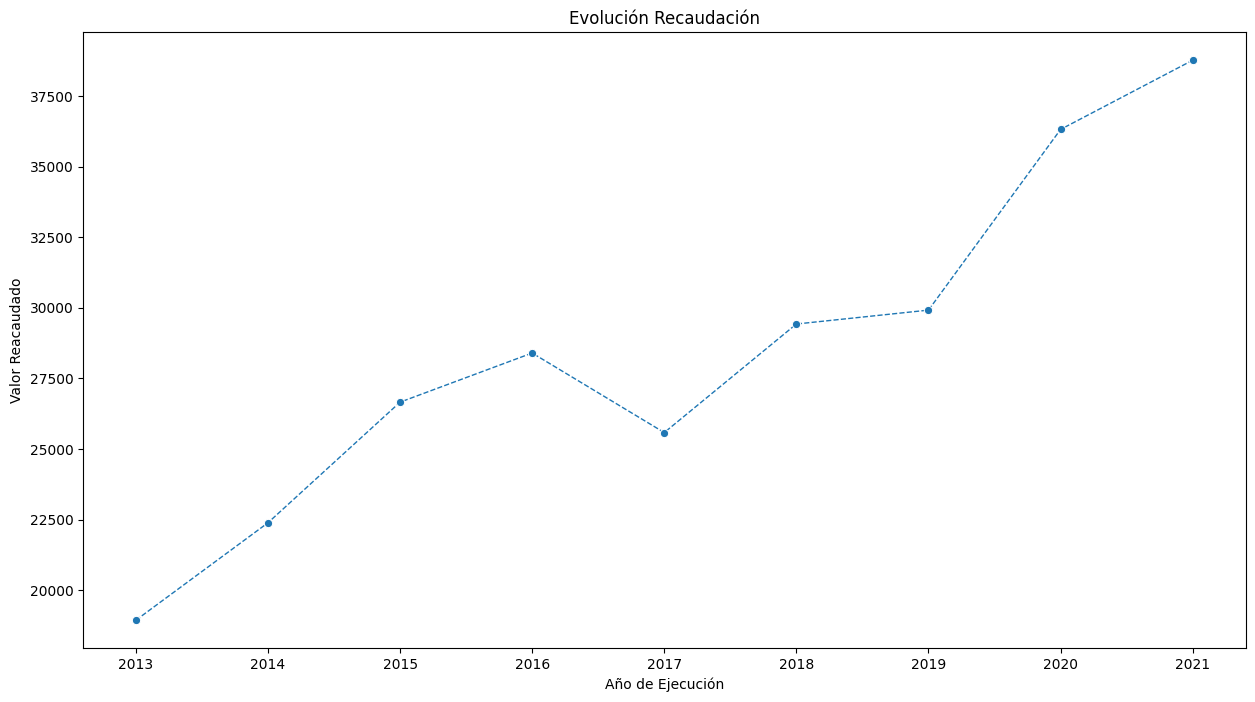

In [167]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 8), sharex = True)

sns.lineplot(x = df_anos.index,
              y = df_anos["VALOR_REALIZADO"], 
                marker = "o", 
                linewidth = 1, 
                palette="mako", 
                linestyle = "dashed", 
                errorbar = None)
axes.set_title("Evolución Recaudación")
axes.set_xlabel("Año de Ejecución")
axes.set_ylabel("Valor Reacaudado")
axes.grid(False)

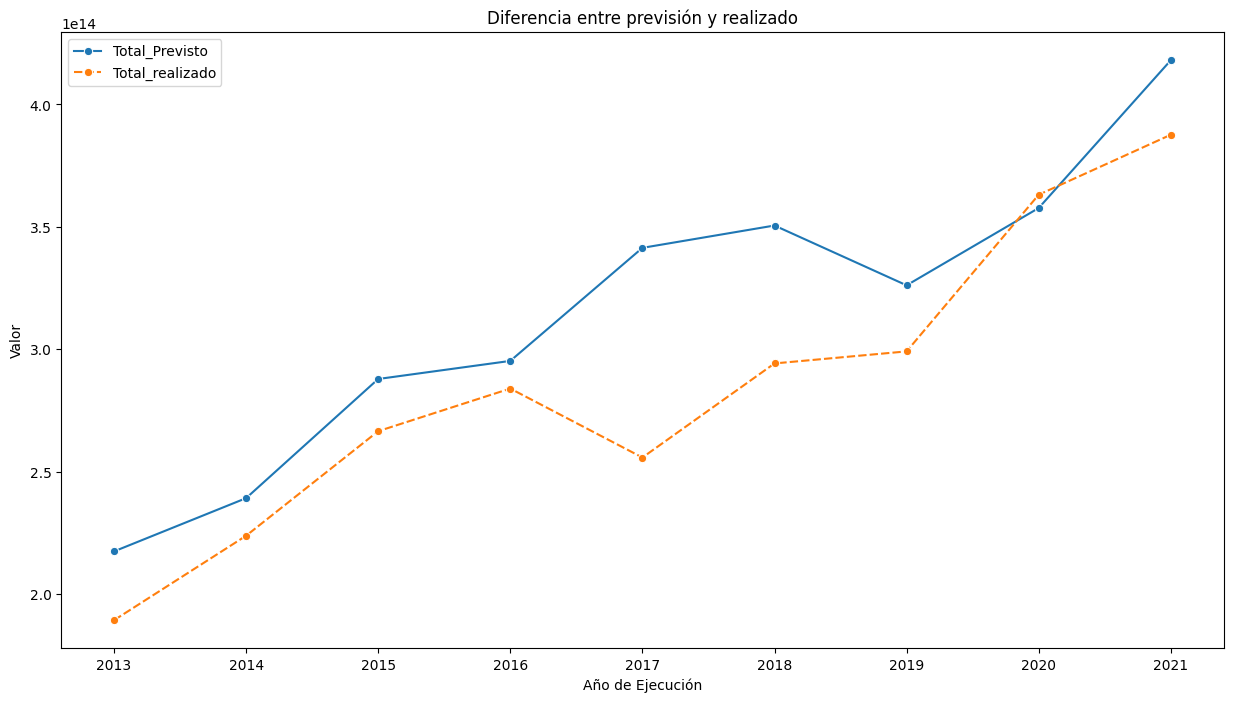

In [168]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 8), sharex = True)

sns.lineplot(data=df_temporal, marker="o", color="b")
axes.set_title("Diferencia entre previsión y realizado")
axes.set_xlabel("Año de Ejecución")
axes.set_ylabel("Valor")
axes.grid(False)

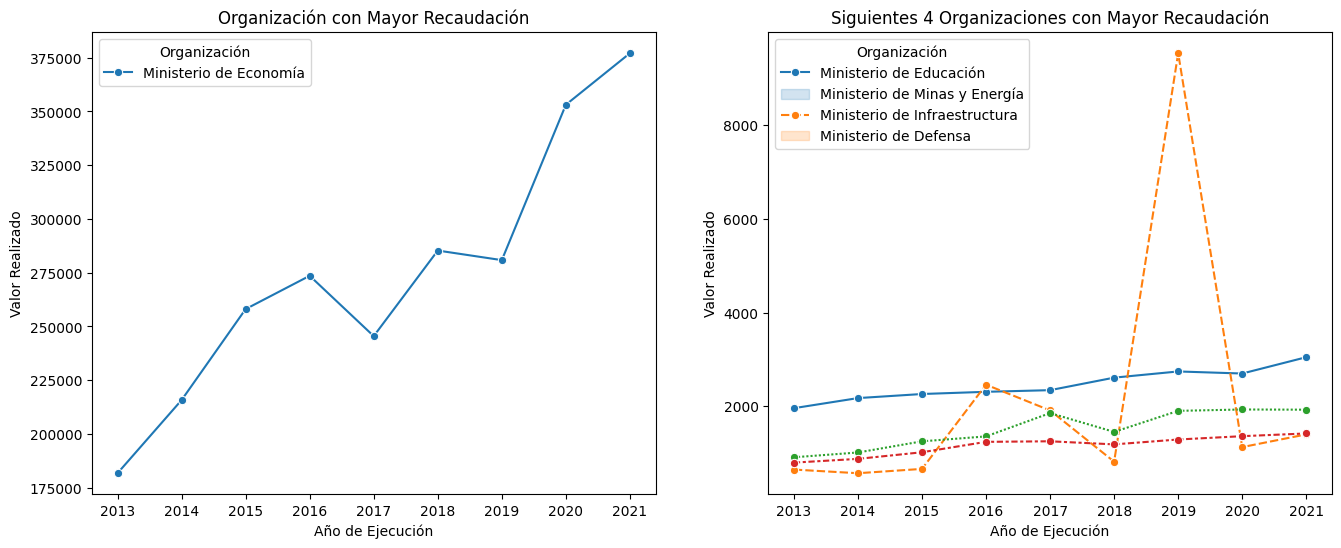

In [169]:
primer_valor = df_org_an1.head(1).drop("TOTAL_RECAUDACION", axis=1)
resto_valores = df_org_an1.iloc[1:5].drop("TOTAL_RECAUDACION", axis=1)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(data=primer_valor.T, marker="o", color="b", ax=axes[0])
axes[0].set_title("Organización con Mayor Recaudación")
axes[0].set_xlabel("Año de Ejecución")
axes[0].set_ylabel("Valor Realizado")
axes[0].legend(primer_valor.index, title="Organización")
axes[0].grid(False)

sns.lineplot(data=resto_valores.T, marker="o", ax=axes[1], palette="tab10")
axes[1].set_title("Siguientes 4 Organizaciones con Mayor Recaudación")
axes[1].set_xlabel("Año de Ejecución")
axes[1].set_ylabel("Valor Realizado")
axes[1].legend(resto_valores.index, title="Organización")
axes[1].grid(False)


* Categóricas

C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\1642334497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NOMBRE_ORGANIZACION_SUPERIOR",
C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\1642334497.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resto_valores2.index,
C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\1642334497.py:15: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=resto_valores2.index,


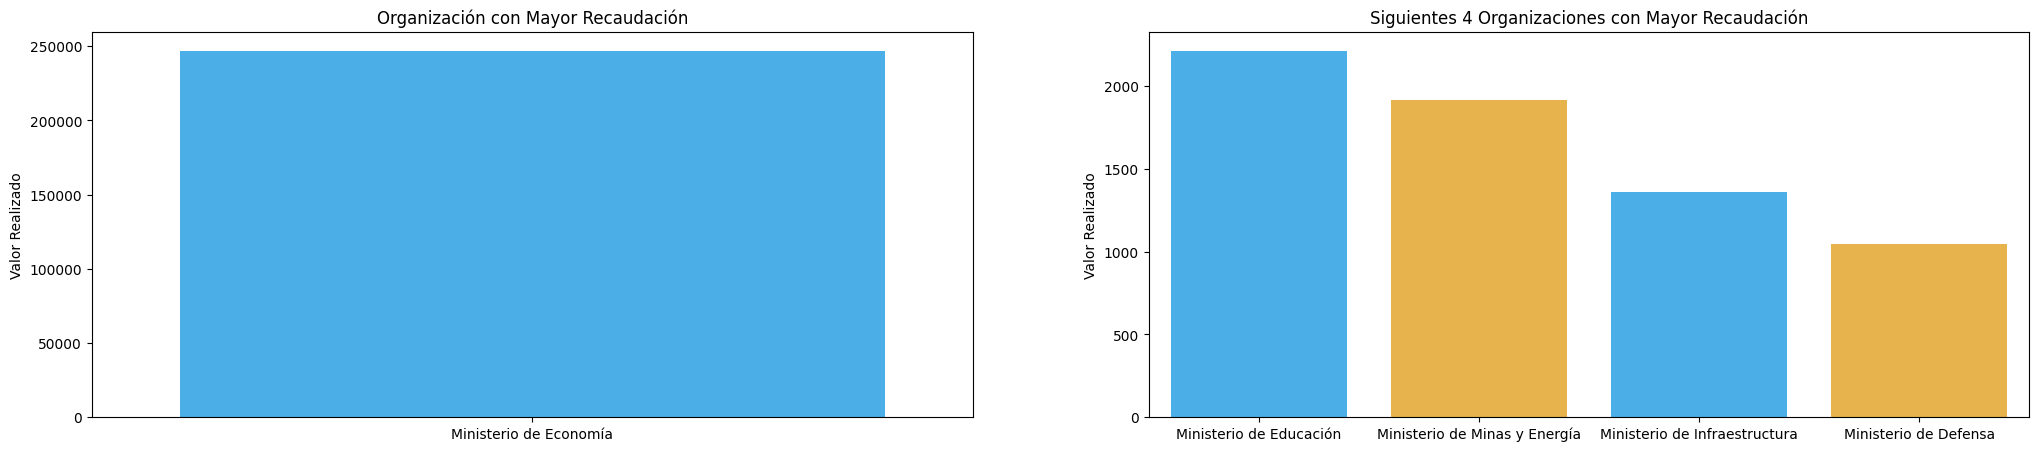

In [170]:
primeros_valores3 = df_org.head(1)
resto_valores2 = df_org.iloc[1:5]
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

sns.barplot(x="NOMBRE_ORGANIZACION_SUPERIOR",
            y="TOTAL_RECAUDACION",
            data=primeros_valores3,
            ax=axes[0],
            palette=["#33B5FF"])
axes[0].set_title("Organización con Mayor Recaudación")
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Valor Realizado")
axes[0].grid(False)

sns.barplot(x=resto_valores2.index,
            y=resto_valores2["TOTAL_RECAUDACION"],
            data=resto_valores2,
            palette=["#33B5FF", "#FFBB33"])

axes[1].set_title("Siguientes 4 Organizaciones con Mayor Recaudación")
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Valor Realizado")
axes[1].grid(False)

C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\1097699618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cat_grafico.index,


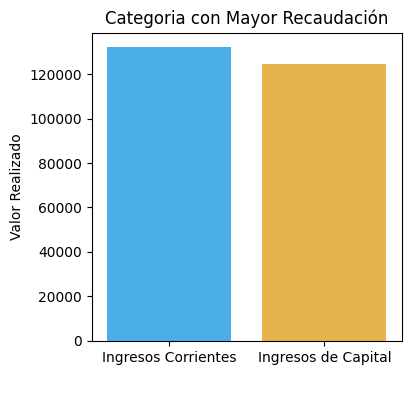

In [171]:
df_cat_grafico = df_cat.head(2)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.barplot(x=df_cat_grafico.index,
            y=df_cat_grafico["TOTAL_RECAUDACION"],
            data=df_cat_grafico,
            palette=["#33B5FF", "#FFBB33"])

axes.set_title("Categoria con Mayor Recaudación")
axes.set_xlabel(" ")
axes.set_ylabel("Valor Realizado")
axes.grid(False)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

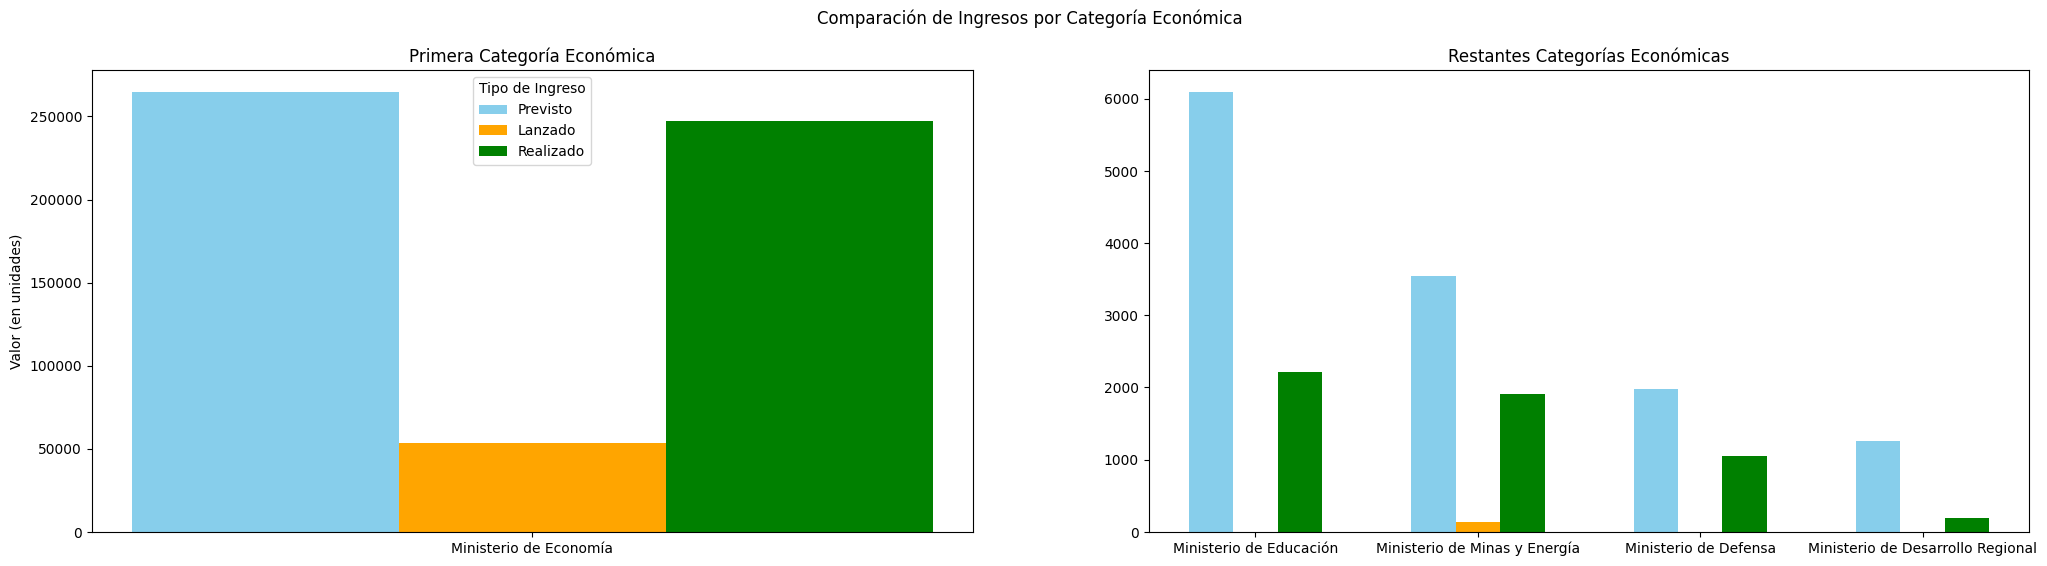

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(25, 6))


categorias_1 = df_organizaciones1.iloc[:1]
x1 = [0]  
ancho_barras = 0.2

# Dibujar barras
axes[0].bar([pos - ancho_barras for pos in x1], categorias_1["Total_Previsto"], 
            width=ancho_barras, label="Previsto", color="skyblue")
axes[0].bar(x1, categorias_1["Total_lanzado"], 
            width=ancho_barras, label="Lanzado", color="orange")
axes[0].bar([pos + ancho_barras for pos in x1], categorias_1["Total_realizado"], 
            width=ancho_barras, label="Realizado", color="green")

axes[0].set_title("Primera Categoría Económica")
axes[0].set_xticks(x1)
axes[0].set_xticklabels(categorias_1.index)
axes[0].set_ylabel("Valor (en unidades)")
axes[0].legend(title="Tipo de Ingreso")

categorias_restantes = df_organizaciones1.iloc[1:]
x2 = range(len(categorias_restantes))

# Dibujar barras
axes[1].bar([pos - ancho_barras for pos in x2], categorias_restantes["Total_Previsto"], 
            width=ancho_barras, label="Previsto", color="skyblue")
axes[1].bar(x2, categorias_restantes["Total_lanzado"], 
            width=ancho_barras, label="Lanzado", color="orange")
axes[1].bar([pos + ancho_barras for pos in x2], categorias_restantes["Total_realizado"], 
            width=ancho_barras, label="Realizado", color="green")

axes[1].set_title("Restantes Categorías Económicas")
axes[1].set_xticks(x2)
axes[1].set_xticklabels(categorias_restantes.index)

plt.suptitle("Comparación de Ingresos por Categoría Económica")
plt.tight_layout



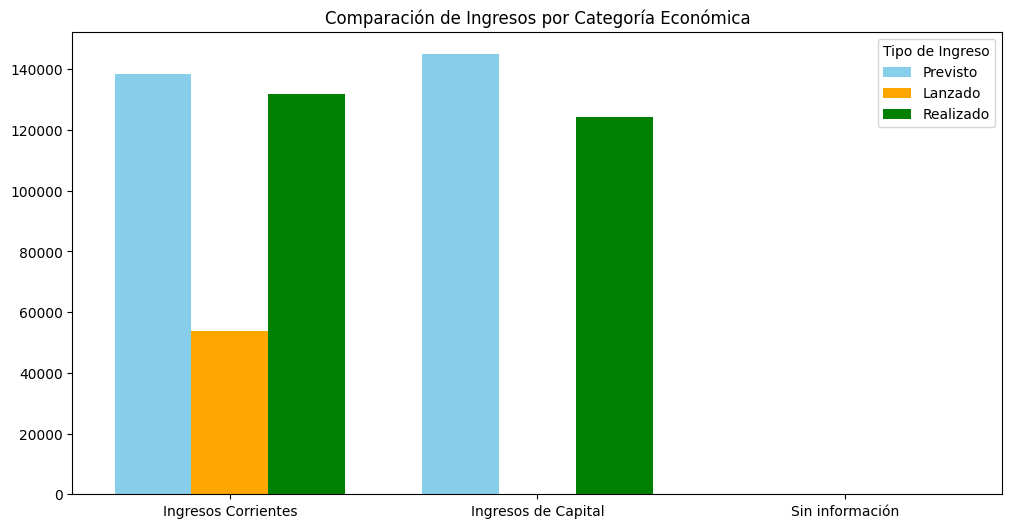

In [208]:
categorias = df_categorias.index
ancho_barras = 0.25

plt.figure(figsize=(12, 6))

x = range(len(categorias))

plt.bar([pos - ancho_barras for pos in x], df_categorias["Total_Previsto"], 
        width=ancho_barras, label="Previsto", color="skyblue")
plt.bar(x, df_categorias["Total_lanzado"], 
        width=ancho_barras, label="Lanzado", color="orange")
plt.bar([pos + ancho_barras for pos in x], df_categorias["Total_realizado"], 
        width=ancho_barras, label="Realizado", color="green")

plt.xticks(x, categorias)
plt.title("Comparación de Ingresos por Categoría Económica")
plt.legend(title="Tipo de Ingreso")

plt.show()


C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\2825047451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_mes.index,
C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\2825047451.py:2: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df_mes.index,


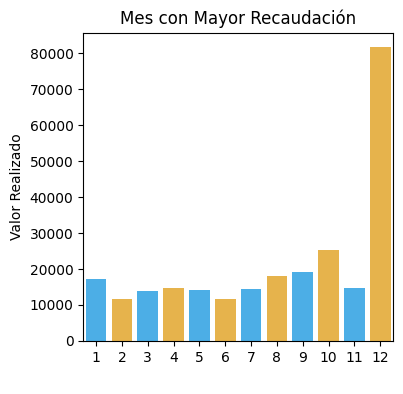

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.barplot(x=df_mes.index,
            y=df_mes["TOTAL_RECAUDACION"],
            data=df_mes,
            palette=["#33B5FF", "#FFBB33"])

axes.set_title("Mes con Mayor Recaudación")
axes.set_xlabel(" ")
axes.set_ylabel("Valor Realizado")
axes.grid(False)

C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\185019589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


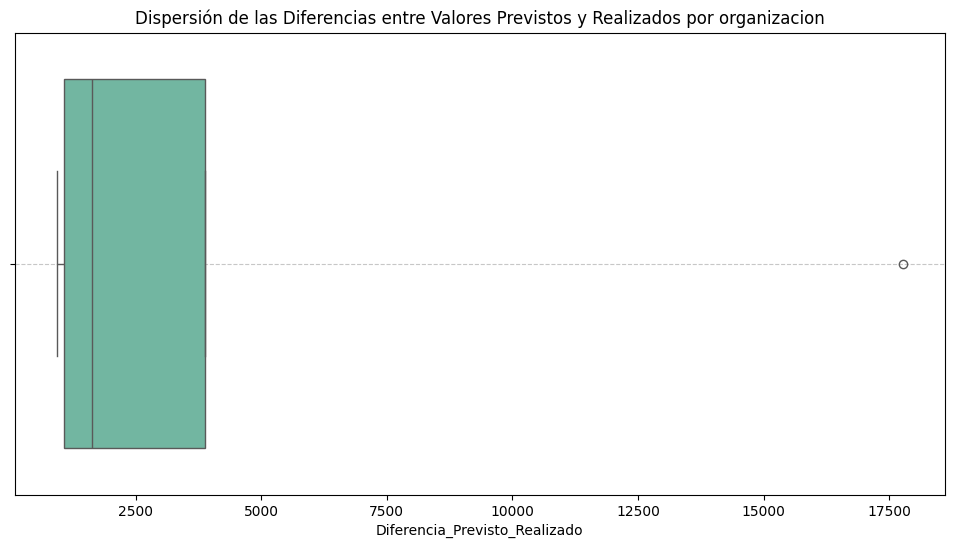

In [234]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_organizaciones1_dfi,
    x=df_organizaciones1_dfi["Diferencia_Previsto_Realizado"],
    palette="Set2")


plt.title("Dispersión de las Diferencias entre Valores Previstos y Realizados por organizacion")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\pepel\AppData\Local\Temp\ipykernel_32272\2688377383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


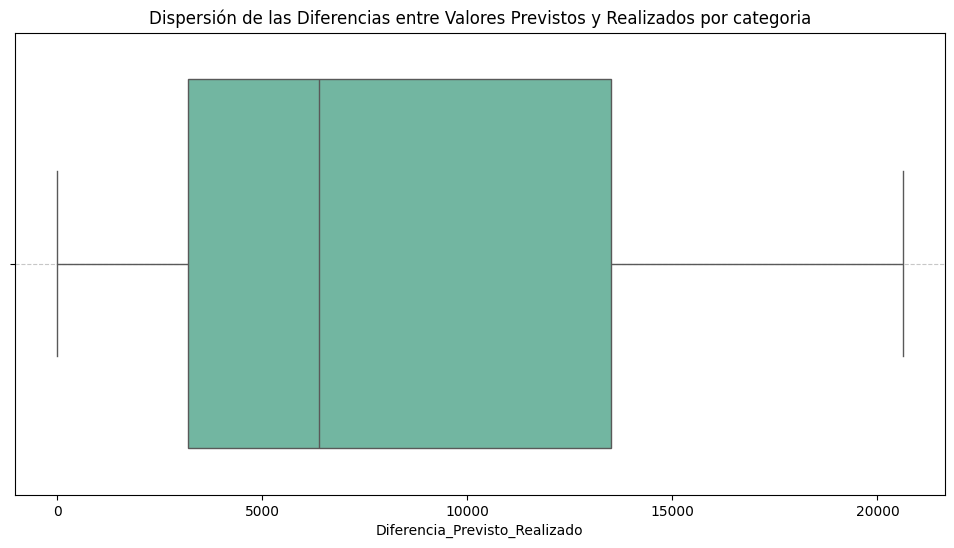

In [238]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_categorias_dif,
    x=df_categorias_dif["Diferencia_Previsto_Realizado"],
    palette="Set2")


plt.title("Dispersión de las Diferencias entre Valores Previstos y Realizados por categoria")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Conclusiones

Tras la exploración de los datos he realizado dos tipos de análisis, uno centrado en la recaudación realizada y otro en las diferencias entre la recaudación prevista y la realizada.

En el primer análisis podemos observar como claramente el Ministerio de Economía es el órgano que más reauda y por tanto las subcategorías dependientes de este ministerio también son las que lideran las recaudaciones.
En cuanto a la categoría, la procedencia de la recaudación es bastante equilibrada entre los ingresos de capital y los ingresos corrientes.
Si pasamos al análisis temporal dentro de la recaudación realizada, se puede observar un incremento sostenido en el tiempo con la excepción del año 2017 donde la recaudación decrece. Un apunte en esta serie temporal es el año 2019, donde el ministerio de infraestructura genera una recaudación extraordinariamente alta que compensa la caida de ingresos en el ministerio de economía (que hemos comentado anteriormente que es la fuente principal de ingresos). En la evolución mesual se observa claramente que diciembre es el mes donde más se recauda.

Viendo el análisis realizado sobre las diferencias entre lo previsto y realizado, podemos observar como la recaudación prevista es superior en toda la línea temporal excepto en el año 2020 donde es ligeramente inferior. Algo a destacar es que únicamente se registran previsiones con importes relevantes en 3 meses y en otros 3 se realizan previsiones pequeñas.
El análisis entre categorías y organizaciones sigue la misma tendencia que el de la recaudación realizada, siendo el ministerio de economía el que tiene una diferencia mayor aunque sorprende la diferencia que existe en los ingresos de capital.

* Proximos pasos / recomendaciones

Como recomendación se podría mejorar la previsión mes a mes para tener un mayor control y quizás así reducir la diferencia con lo finalmente recaudado

Como próximos pasos trataría de analizar en profundidad el motivo por el cual hay varios impuestos sin previsión y sin valor lanzado pero que finalmente si son recaudados así como el motivo de las diferencias tan grandes.